<a href="https://colab.research.google.com/github/MaryamSayed01/Bank-System/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phase 1:Load MNIST dataset**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras
import keras.utils
from keras import utils as np_utils

In [2]:
mnist.load_data?

11501568/11490434 [==============================] - 0s 0us/step


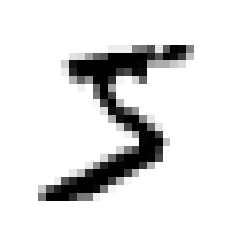

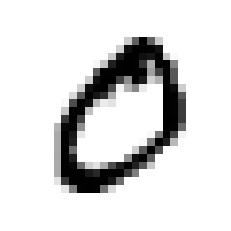

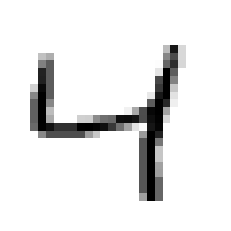

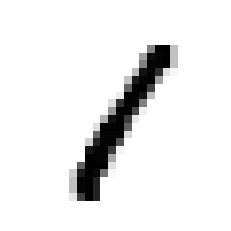

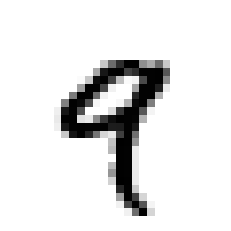

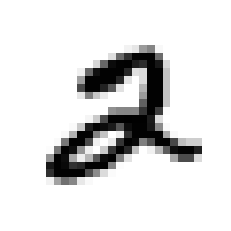

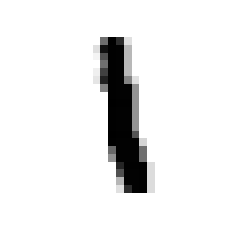

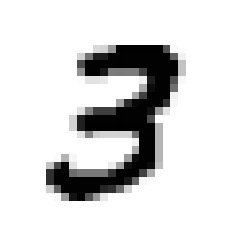

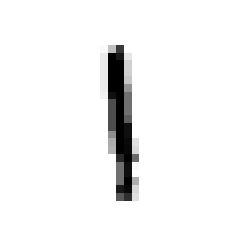

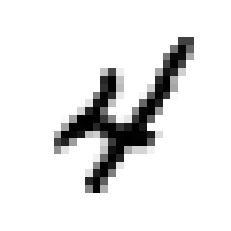

In [3]:
#Data is loaded as Matrix to Display the images we use imshow function
(X_train, y_train), (X_test, y_test)=mnist.load_data()
#ٍSee how Data imgs look like(We'll comment it in the future)
def plot_images(index):
  plt.imshow(X_train[index],cmap='binary')
  plt.axis('off')
  plt.show()
for i in range(10):
  plot_images(i)

## **Phase 2: Apply HOG features to the images**

# <center> Histogram of Oriented Gradients (HOG)
## Steps: 
### In HOG we have 2 important Value Gradients and Orientation 
### 1- Preprocess
### 2- Calculate Gradients (x,y)
    [to find the small change in x and y axis]
    we'll get 2 matrices one for x and the other for y Changes
### 3- Calculate the Magnitude and Orientation 
    for each pixle using gradients from previous step 
    (Total Gradient Magnitude =  √[(Gx)2+(Gy)2]),Orientation (tan(Φ) = Gy / Gx)
#### 4-Calculate Histogram of Gradients 
    In this step we try to creat histogram using Gradients  oriantations
    If we divide the image into 8×8 cells and generate the histograms, we will get a 9 x 1 matrix for each cell
### 5-Normalize gradients
    We do this step to reduce lightinig that might be exsist in parts of any pic



In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from keras import utils as np_utils 
#PreProcess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
#convert to vector
y_train =  tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
for i in range(60000):
    resized_img = resize(X_train[i], (28,28))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1)) 
    X_train[i]=hog_image_rescaled

In [7]:
for i in range(10000):
    resized_img = resize(X_test[i], (28,28))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1)) 
    X_test[i]=hog_image_rescaled

In [8]:
#Reshape The Data as one of the models we'll apply should get 4d array 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Resources
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog
https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
https://www.programcreek.com/python/example/93846/skimage.exposure.rescale_intensity

# Applying CNN (Convolution Neural Network) Model

In the previos step we reached after applying the HOG we reshaped our data, Why?
As this Model only can be applied on 4D array

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D